In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

ImportError: cannot import name 'pywrap_tensorflow' from 'tensorflow.python' (C:\Users\Gokul\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\__init__.py)

In [2]:
train_dir = 'C:/Users/Gokul/Desktop/Project/DATASET/TRAIN' #directory with training images
test_dir = 'C:/Users/Gokul/Desktop/Project/DATASET/TEST' #directory with testing images

In [3]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [4]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [5]:
model = tf.keras.models.Sequential([   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])


c:\Users\Gokul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
#optimizer = Adam(lr=1e-3)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss='categorical_crossentropy',
              metrics=['accuracy'])
epochs = 50  
batch_size = 16


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   205,521,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,897,861 (785.44 MB)

 Trainable params: 205,897,861 (785.44 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 411s 7s/step - accuracy: 0.2504 - loss: 1.7102 - val_accuracy: 0.2283 - val_loss: 1.6046
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 439s 8s/step - accuracy: 0.2396 - loss: 1.6041 - val_accuracy: 0.2500 - val_loss: 1.5939
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 464s 8s/step - accuracy: 0.3014 - loss: 1.6067 - val_accuracy: 0.2500 - val_loss: 1.5944
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 471s 8s/step - accuracy: 0.2589 - loss: 1.5901 - val_accuracy: 0.2609 - val_loss: 1.5894
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 367s 7s/step - accuracy: 0.2698 - loss: 1.5843 - val_accuracy: 0.3043 - val_loss: 1.5648
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.2662 - loss: 1.5588 - val_accuracy: 0.3587 - val_loss: 1.5204
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - accuracy: 0.3222 - loss: 1.5035 - val_accuracy: 0.5000 - val_loss: 1.3130
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.4186 - loss: 1.4281 - val_accuracy: 0.5870 - v

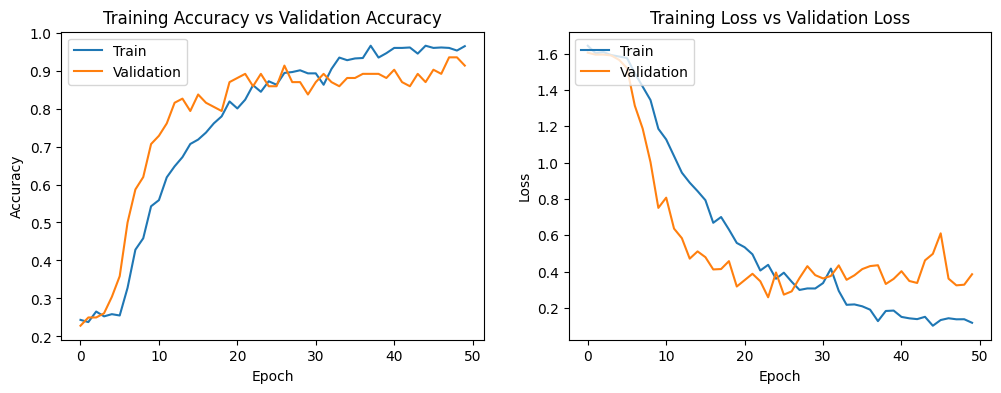

In [12]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [13]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

55/55 ━━━━━━━━━━━━━━━━━━━━ 48s 869ms/step - accuracy: 0.9903 - loss: 0.0446
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9096 - loss: 0.3352
final train accuracy = 99.31 , validation accuracy = 91.30


In [14]:
model.save('YogaNet_model_1_1.h5')

In [15]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('YogaNet_model_1_1.h5')
img = image.load_img('../DATASET/TEST/goddess/00000000.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'YogaNet_model_1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)